# 목표
- **0.89714 넘기기 (10%(77등) 안에 들기)**

# 데이터 준비 및 결측값 확인

- 데이터셋 추가
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
import numpy as np
import pandas as pd

# 데이터 경로
data_path = '/content/'

train = pd.read_csv(data_path + 'train.csv',index_col='id')
test = pd.read_csv(data_path + 'test.csv',index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv',index_col='id')

original_data = pd.read_csv(data_path + 'healthcare-dataset-stroke-data.csv',index_col='id')

In [ ]:
train.shape, test.shape, submission.shape, original_data.shape

((15304, 11), (10204, 10), (10204, 1), (5110, 11))

In [ ]:
print(train.columns)
print(test.columns)
print(submission.columns)
print(original_data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
Index(['stroke'], dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10204 entries, 15304 to 25507
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             10204 non-null  object 
 1   age                10204 non-null  float64
 2   hypertension       10204 non-null  int64  
 3   heart_disease      10204 non-null  int64  
 4   ever_married       10204 non-null  object 
 5   work_type          10204 non-null  object 
 6   Residence_type     10204 non-null  object 
 7   avg_glucose_level  10204 non-null  float64
 8   bmi                10204 non-null  float64
 9   smoking_status     10204 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 876.9+ KB


In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [ ]:
# 결측치가 없다.
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
# 결측치가 없다.
test.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [ ]:
# bmi 컬럼에 결측치 존재
original_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
def summary_feature_info(train=train):
  '''
    # 피쳐 요약 정보 생성하는 함수 구성
    # 전체 데이터 : 볼륨(형상) -> print()
    # 피쳐별 : 피쳐명, 타입, 결측치수, 고유값수, 샘플값 0~2(0,1,2개) => DF로 구성 출력
    # 피쳐를 파악해 보겠다.
  '''
  sum_df = pd.DataFrame(train.dtypes, columns=['type'])
  # 인덱스 -> 컬럼으로 이동
  sum_df = sum_df.reset_index()
  # 컬렴명 index -> feature_name 변경
  sum_df.rename(columns={'index':'feature_name'}, inplace=True)

  # 결측값
  sum_df['결측값수'] = train.isnull().sum().values

  # 고유값
  sum_df['고유값수'] = train.nunique().values

  # 샘플값 0~2(0,1,2개 정도)
  sum_df['샘플값 0'] = train.loc[0].values
  sum_df['샘플값 1'] = train.loc[1].values
  sum_df['샘플값 2'] = train.loc[2].values

  return sum_df
summary_df = summary_feature_info(train)
summary_df

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
0,gender,object,0,3,Male,Male,Female
1,age,float64,0,106,28.0,33.0,42.0
2,hypertension,int64,0,2,0,0,0
3,heart_disease,int64,0,2,0,0,0
4,ever_married,object,0,2,Yes,Yes,Yes
5,work_type,object,0,5,Private,Private,Private
6,Residence_type,object,0,2,Urban,Rural,Rural
7,avg_glucose_level,float64,0,3740,79.53,78.44,103.0
8,bmi,float64,0,407,31.1,23.9,40.3
9,smoking_status,object,0,4,never smoked,formerly smoked,Unknown


In [ ]:
test.gender.unique(), train.work_type.unique(), train.smoking_status.unique()

(array(['Female', 'Male', 'Other'], dtype=object),
 array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
       dtype=object))

In [ ]:
# original bmi 평균값으로 채움
original_data["bmi"].fillna(original_data["bmi"].mean(),inplace=True)
original_data = original_data[list(train.columns)]

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [ ]:
# 훈련 데이터셋 증강
train = pd.concat([train, original_data]).reset_index(drop=True)
train.shape

(20414, 11)

# EDA 및 피처엔지니어링

- 이진형
  - hypertension
  - heart_disease
  - ever_married
  - Residence_type
- 수치형
  - avg_glucose_level
  - bmi
  - age
- 명목형
  - gender
  - work_type
  - smoking_status
- 정답
  - stroke

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

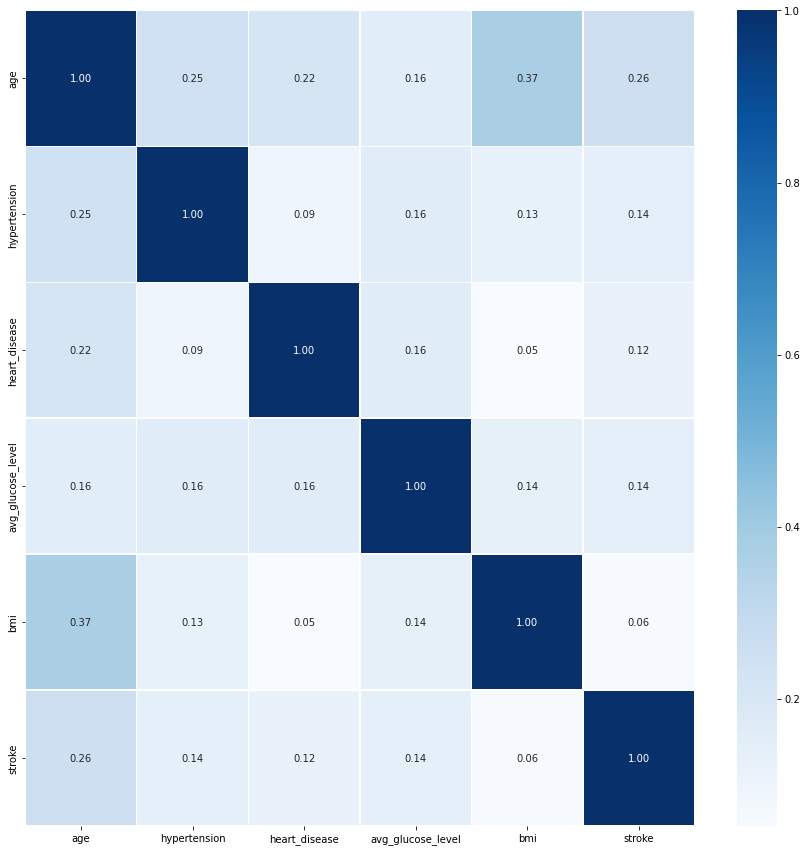

In [ ]:
# 전체 피쳐간 상관관계 히트맵 시각화
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues');

# 나이와 결혼여부의 상관관계가 있으며 두 피쳐는 bmi와 약한 상관관계를 보인다.
# 그 외에 다른 피쳐들 간의 관계성이 낮다.
# 뇌졸증은 그나마 나이랑 가장 상관 관계를 맺고 있는 듯하다.

## 이진형

### 데이터 정리

In [ ]:
train.gender.value_counts()

Female    12440
Male       7972
Other         2
Name: gender, dtype: int64

In [ ]:
# 관련 피쳐만 출력 2~4, 6, gender(other이 1개이므로 처리)
display(summary_df.loc[2:4], summary_df.loc[6], summary_df.loc[0])

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
2,hypertension,int64,0,2,0,0,0
3,heart_disease,int64,0,2,0,0,0
4,ever_married,object,0,2,Yes,Yes,Yes


feature_name    Residence_type
type                    object
결측값수                         0
고유값수                         2
샘플값 0                    Urban
샘플값 1                    Rural
샘플값 2                    Rural
Name: 6, dtype: object

feature_name    gender
type            object
결측값수                 0
고유값수                 3
샘플값 0             Male
샘플값 1             Male
샘플값 2           Female
Name: 0, dtype: object

In [ ]:
train.gender.unique(), test.gender.unique()

(array(['Male', 'Female', 'Other'], dtype=object),
 array(['Female', 'Male', 'Other'], dtype=object))

In [ ]:
bin_datas = ['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'gender']

for i in range(5):
  feature_name = bin_datas[i]
  print(f'{feature_name}의 교유값 : {train[feature_name].unique()}')

hypertension의 교유값 : [0 1]
heart_disease의 교유값 : [0 1]
ever_married의 교유값 : ['Yes' 'No']
Residence_type의 교유값 : ['Urban' 'Rural']
gender의 교유값 : ['Male' 'Female' 'Other']


### 이진형 피쳐 시각화

타겟값 간 비율 22.171396140749152


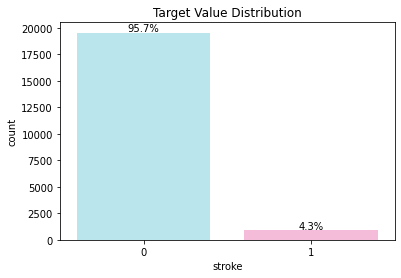

In [ ]:
# 향후 시각화 자료에 비율을 표기하는 부분을 추가 => 텍스트 드로잉
def show_text_perent_by_target(ax, total_count, is_show = True,  ):
  '''
    is_show : True일 때만 텍스트가 노출되게 처리
    ax : 텍스트를 그리고자 하는 차트의 축정보
    total_count : 전체 카운트 수
  '''
  persents = list() # 비율을 담는 그릇
  # 카운트 플롯 차트상에 개별 박스 정보를 구하는 방법 -> ax.patches

  # 카운트 플롯 차트상에서 순차적으로 박스를 하나씩 추출한다.
  for patch in ax.patches: # 차트상에 존재하는 모든 형태의 도형을 차례대로 추출하는 연속형 변수
    w = patch.get_width() # 타겟값 0 혹은 1, 카운트 플롯의 개별 박스 넓이
    h = patch.get_height() # 타겟값 0 혹은 1의 카운트 수 -> 카운트 플롯의 개별 박스 높이 -> 카운트
    p = h / total_count * 100 # 타겟값의 비율 (개별박스의 높이(카운트) / 전체카운트) * 100

    persents.append(p)
    # 텍스트 그리기
    # 좌표 정보 획득
    l = patch.get_x() # 도형 왼쪽 테두리 X축의 기준 위치값

    ax.text(
        x = l + w/2, # 도형의 정 가운데를 x축 좌표 
        y = h + total_count * 0.005, # total_count(가변값)의 특정 비율로 올려서 위치를 조정
        s = f'{p:1.1f}%', # 타겟값의 비율을 개별 차트 내 도형 위에 그려지는 내용 ex ) 38.8%
        ha = 'center' # 정렬(가운데)
    )
  if is_show : 
      if len(persents) == 2: # 타겟용
        print('타겟값 간 비율',persents[0]/persents[1])
      elif len(persents) == 4: # 이진 피쳐용
        #print(persents)
        # 타겟값에 맞춰서 도형이 그려진다. 0번 타겟이 먼저 그려지고, 1번 타겟이 나중에 그려진다.
        print(persents[0]/persents[2], persents[1]/persents[3])
  pass

ax = sns.countplot(data=train, x='stroke', palette=['#B2EBF4',"#FFB2D9"]);
show_text_perent_by_target(ax, train.shape[0])
ax.set_title('Target Value Distribution');

# 뇌졸증을 앓고 있지 않은 사람의 비중이 압도적이다.

26.882096069868997 5.489690721649484


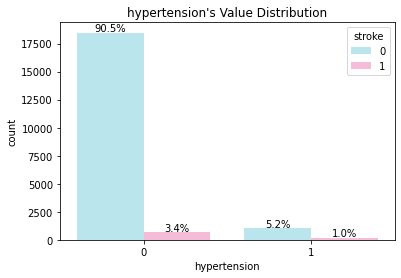

24.756510416666668 4.601769911504425


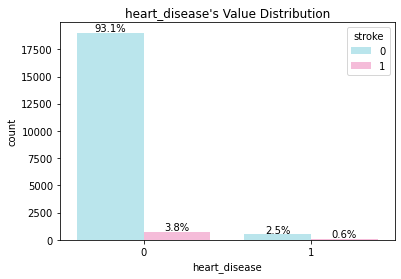

15.939580764488285 94.37142857142858


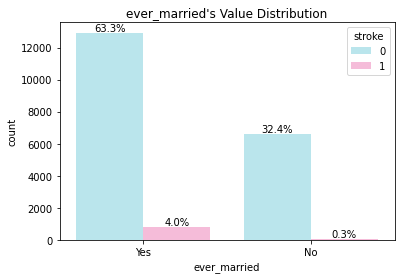

21.746666666666666 22.614849187935036


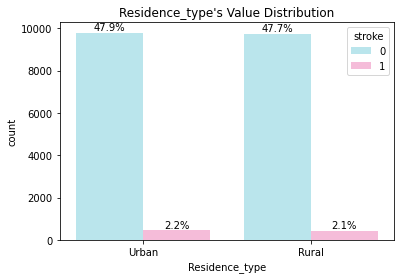

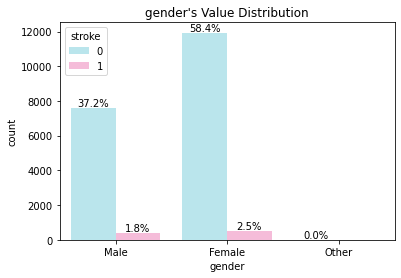

In [ ]:
bin_features = [bin_datas[i] for i in range(5)]

for bin_feature in bin_features : 
  ax = sns.countplot(data=train, x=bin_feature, hue='stroke', palette=['#B2EBF4',"#FFB2D9"]);
  show_text_perent_by_target(ax, train.shape[0])
  ax.set_title(f'{bin_feature}\'s Value Distribution');
  plt.show()

# 타겟값 기준 : 23.2136
# 비율이 제각각이지만 일단 그냥 진행

### 시각화 분석결과

- 고혈압이 있는 사람이 거의 없다.
- 심장병을 앓고 있는 사람들은 거의 없다
- 기혼자가 미혼자의 두 배이다.
- 도시와 시골의 거주 비율이 균등하다.
- 데이터에 남성보다 여성이 훨씬 많다
(알 수 없는 other 값이 있다)
- 고혈압 환자 중 뇌졸증 환자는 5%, 심장질환 환자 중 뇌졸증 환자는 4%에 불과하다.



### 데이터 인코딩

In [ ]:
train.shape, test.shape

((20414, 11), (10204, 10))

In [ ]:
bin_features

['hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'gender']

In [ ]:
def make_feature_name(bin_features, size, offset=0):
  return [bin_features[i] for i in range(offset, size)]

bin_enc_feats = make_feature_name(bin_features, 5, 2)

bin_enc_feats

['ever_married', 'Residence_type', 'gender']

In [ ]:
train[bin_enc_feats[2]].mode()[0], test[bin_enc_feats[2]].mode()[0]

# 'Other' 값 처리 Female이 최빈값으로 나온다.

('Female', 'Female')

In [ ]:
train[bin_enc_feats[0]] = train[bin_enc_feats[0]].map({'Yes':1, 'No':0})
train[bin_enc_feats[1]] = train[bin_enc_feats[1]].map({'Urban':1, 'Rural':0})
train[bin_enc_feats[2]] = train[bin_enc_feats[2]].map({'Male':1, 'Female':0, 'Other':0})

In [ ]:
test[bin_enc_feats[0]] = test[bin_enc_feats[0]].map({'Yes':1, 'No':0})
test[bin_enc_feats[1]] = test[bin_enc_feats[1]].map({'Urban':1, 'Rural':0})
test[bin_enc_feats[2]] = test[bin_enc_feats[2]].map({'Male':1, 'Female':0, 'Other':0})

In [ ]:
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,28.0,0,0,1,Private,1,79.53,31.1,never smoked,0
1,1,33.0,0,0,1,Private,0,78.44,23.9,formerly smoked,0
2,0,42.0,0,0,1,Private,0,103.00,40.3,Unknown,0
3,1,56.0,0,0,1,Private,1,64.87,28.8,never smoked,0
4,0,24.0,0,0,0,Private,0,73.36,28.8,never smoked,0


## 명목형

### 데이터 정리

In [ ]:
nom_datas = ['work_type', 'smoking_status']
train[nom_datas].head(5)

,work_type,smoking_status
0,Private,never smoked
1,Private,formerly smoked
2,Private,Unknown
3,Private,never smoked
4,Private,never smoked


In [ ]:
summary_feature_info(train[nom_datas])

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
0,work_type,object,0,5,Private,Private,Private
1,smoking_status,object,0,4,never smoked,formerly smoked,Unknown


### 명목형 피쳐 시각화

In [ ]:
def make_cross_tab(df, feature_name):
  cross_tab = pd.crosstab(df[feature_name], df['stroke'], normalize='index') * 100
  cross_tab.reset_index(inplace=True)
  return cross_tab

def show_pointplot(feature, cross_tab, color, ax=None):
  sns.pointplot(x=feature, y=1, data=cross_tab, order=cross_tab[feature], color=color, ax=ax);

0.7447693625351769 1.0989085948158253


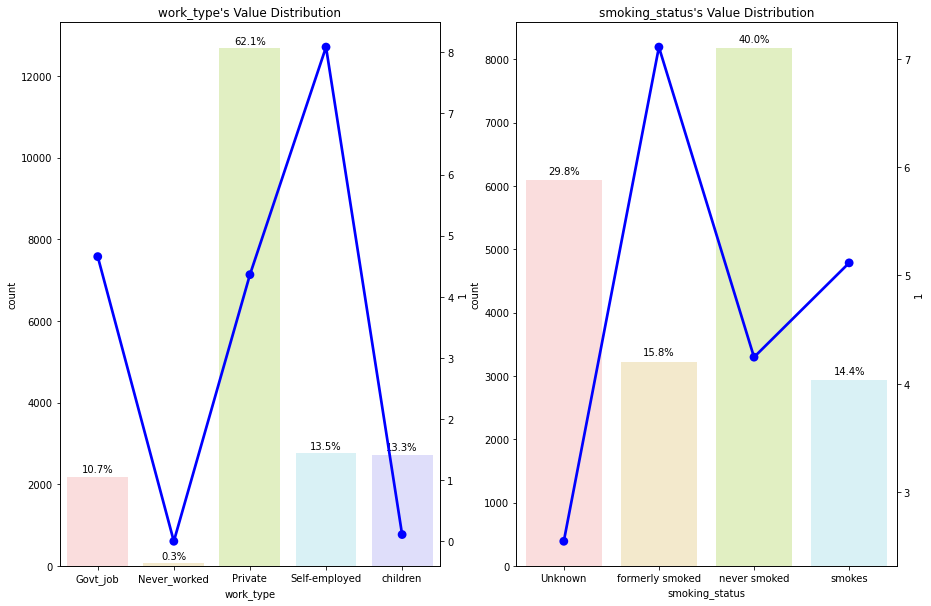

In [ ]:
import matplotlib.gridspec as gridspec

p_grid = gridspec.GridSpec(1, 2)

def show_count_point_plot( all_data, features, rows=1, cols=1 ):
  plt.figure( figsize=(15, 10) )
  p_grid = gridspec.GridSpec(rows, cols)
  palette=['#FFD8D8',"#FAECC5", "#E4F7BA", "#D4F4FA", '#DAD9FF' ]

  for idx, feature in enumerate( features ):
    ax = plt.subplot( p_grid[idx] )
    cross_tab = make_cross_tab( all_data, feature )
    sns.countplot( data=all_data, x=feature, ax=ax, order=cross_tab[feature], palette=palette[:len(feature)])
    show_text_perent_by_target( ax, all_data.shape[0] )
    ax.set_title(f'{ feature }\'s Value Distribution')
    show_pointplot( feature, cross_tab, 'blue', ax.twinx() )
  plt.show()  

show_count_point_plot( train, nom_datas, cols=2 )

# 구분이 잘 된다. 사용 가능!

### 시각화 분석결과

- 62%가 개인 직원이다
- 40%가 담배를 피운적이 없다
- 자영업자, 담배를 폈었던 적이 있는 사람의 뇌졸증 비율이 높다.

### 데이터 인코딩

In [ ]:
# 피쳐가 6개 이하이기 때문에 원-핫 인코딩 처리
from sklearn.preprocessing import OneHotEncoder

enc_nom_train = OneHotEncoder().fit_transform( np.array( train[nom_datas] ) )
enc_nom_test = OneHotEncoder().fit_transform( np.array( test[nom_datas] ) )
enc_nom_train.shape, enc_nom_test.shape

((20414, 9), (10204, 9))

In [ ]:
enc_nom_train

<20414x9 sparse matrix of type '<class 'numpy.float64'>'
	with 40828 stored elements in Compressed Sparse Row format>

## 수치형




### 데이터 정리

In [ ]:
num_datas = ['age', 'avg_glucose_level', 'bmi' ]
train[num_datas].head(5)

,age,avg_glucose_level,bmi
0,28.0,79.53,31.1
1,33.0,78.44,23.9
2,42.0,103.00,40.3
3,56.0,64.87,28.8
4,24.0,73.36,28.8


In [ ]:
summary_feature_info(train[num_datas])

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
0,age,float64,0,106,28.00,33.00,42.0
1,avg_glucose_level,float64,0,4644,79.53,78.44,103.0
2,bmi,float64,0,441,31.10,23.90,40.3


### 수치형 피쳐 시각화

In [ ]:
import seaborn as sns

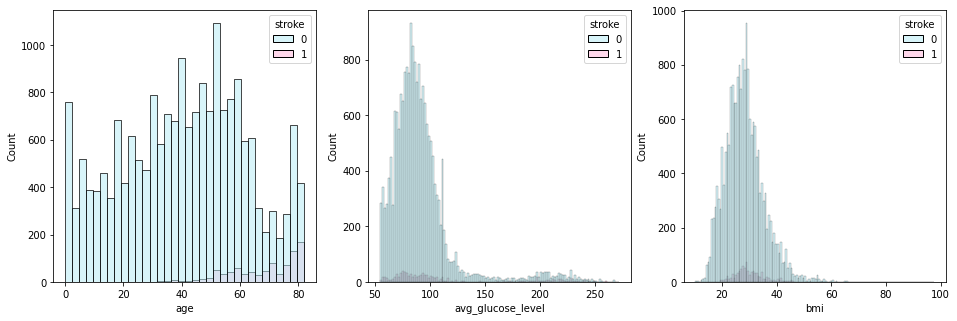

In [ ]:
# age 히스토그램
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=train, x='age', hue='stroke', palette=['#B2EBF4',"#FFB2D9"]);
plt.subplot(1, 3, 2)
sns.histplot(data=train, x='avg_glucose_level', hue='stroke', palette=['#B2EBF4',"#FFB2D9"]);
plt.subplot(1, 3, 3)
sns.histplot(data=train, x='bmi', hue='stroke', palette=['#B2EBF4',"#FFB2D9"]);

# 회색 구간이 두 그래프가 겹친 구간
# 40세 이전까지는 뇌졸중 발병이 거의 없다 
# 40세 이상도 뇌졸중에 걸리지 않은 사람이 압도적이다. 
# stroke 0 값이 압도적이다,,,

In [ ]:
# stroke는 1에 비해 0은 23.2배 많다
c0, c1 = np.unique(train.stroke.values, return_counts=True)[1]
c0 / c1

22.17139614074915

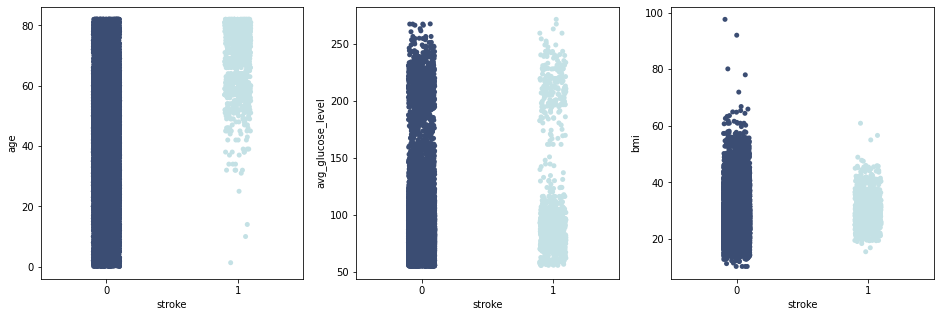

In [ ]:
# 산점도
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.stripplot(data=train , x='stroke', y='age', palette="ch:r=-.2,d=.3_r");
plt.subplot(1, 3, 2)
sns.stripplot(data=train, x='stroke', y='avg_glucose_level', palette="ch:r=-.2,d=.3_r");
plt.subplot(1, 3, 3)
sns.stripplot(data=train, x='stroke', y='bmi', palette="ch:r=-.2,d=.3_r");

# 뇌졸중 환자는 50세 이상, avg_glucose_level(포도당 수치)이 낮은편, bmi는 20~40 정도이다.
# 이상치가 몇개 보이는데 그냥 넘어가도 될듯하다.

- age, bmi, avg_glucose_level 모두 사용
- 수치형이기 때문에 인코딩 필요없이 스케일 조정 (MinMaxScaler)

### 시각화 분석결과

- 40세 이전까지는 뇌졸중 발병이 거의 없다 
- 40세 이상도 뇌졸중에 걸리지 않은 사람이 압도적이다. 
-뇌졸중 환자는 보통 50세 이상, avg_glucose_level(포도당 수치)이 낮은편, bmi는 20~40 정도이다.

### 데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 최댓값은 1로, 최솟값은 0으로 데이터의 범위를 조정
enc_num_train = MinMaxScaler().fit_transform(train[num_datas])
enc_num_test = MinMaxScaler().fit_transform(test[num_datas])

In [ ]:
enc_num_train

array([[0.34082031, 0.11268581, 0.23825888],
       [0.40185547, 0.10765396, 0.15578465],
       [0.51171875, 0.22103222, 0.34364261],
       ...,
       [0.42626953, 0.12865848, 0.2325315 ],
       [0.62158203, 0.51320284, 0.17525773],
       [0.53613281, 0.13922999, 0.18213058]])

In [ ]:
enc_num_test

array([[0.69482422, 0.12904744, 0.2543554 ],
       [0.85351562, 0.07972515, 0.19744483],
       [0.06005859, 0.22872741, 0.09291521],
       ...,
       [0.03564453, 0.23023343, 0.07897793],
       [0.37744141, 0.12843562, 0.19976771],
       [0.0234375 , 0.14118976, 0.03832753]])

## 데이터 병합(포멧 맞춰서, CSR)

- df의 데이터와 CSR 데이터가 합병 => CSR로 합병

In [ ]:
train[bin_features].shape, enc_nom_train.shape, enc_num_train.shape

((20414, 5), (20414, 9), (20414, 3))

In [ ]:
from scipy import sparse

final_train_data_csr = sparse.hstack( [
    train[bin_features],        # 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'gender' (20414, 5)
    enc_nom_train,              # 'work_type', 'smoking_status' (20414, 9)
    enc_num_train               # 'age', 'avg_glucose_level', 'bmi' (20414, 3)
], format='csr')

final_train_data_csr

<20414x17 sparse matrix of type '<class 'numpy.float64'>'
	with 135895 stored elements in Compressed Sparse Row format>

In [ ]:
test[bin_features].shape, enc_nom_test.shape, enc_num_test.shape

((10204, 5), (10204, 9), (10204, 3))

In [ ]:
final_test_data_csr = sparse.hstack( [
    test[bin_features],        # 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'gender' (10204, 5)
    enc_nom_test,              # 'work_type', 'smoking_status' (10204, 9)
    enc_num_test               # 'age', 'avg_glucose_level', 'bmi' (10204, 3)
], format='csr')

final_test_data_csr

<10204x17 sparse matrix of type '<class 'numpy.float64'>'
	with 67883 stored elements in Compressed Sparse Row format>

# 베이스라인 구축 및 모델 선정

## 베이스라인 구축

### Logistic Regression

- Logistic Regression을 이용하여 베이스 라인을 구축하였다.


In [ ]:
!pip install --upgrade scikit-learn # scikit-learn 업그레이드, 런타임 재시작 필요(결과값이 달라짐.)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
# 데이터 분리 

X = final_train_data_csr
y = train['stroke']

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.01, stratify=y, random_state=0 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20209, 17), (205, 17), (20209,), (205,))

In [ ]:
clf = LogisticRegression()

# 하이퍼파라미터
clf_params = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],   # 규제강도, 높을수록 강함, -> L1, L2가 적용시 규제 강도를 강화
    'max_iter':[500, 750, 1000],   #  모델 성능을 오리기 위해서 학습의 반복 횟수 제한
    'solver':['liblinear'],        # 과정합 방지용 지표 L1, L2 를 모두 지원 -> 방식
    'random_state':[100],          # 난수 시드
}

# 그리드서치 CV -> 최적 파라미터 획득
clf_model = GridSearchCV(clf, clf_params, scoring='roc_auc', cv=5)

# 훈련
clf_model.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 750, 1000], 'random_state': [100],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
clf_model.best_params_, clf_model.best_score_

({'C': 1, 'max_iter': 500, 'random_state': 100, 'solver': 'liblinear'},
 0.8730726684471591)

In [ ]:
# 타겟값 1일 확률 예측
y_pred = clf_model.best_estimator_.predict_proba( final_test_data_csr )[:, 1]
# 파일 저장
submission['stroke'] = y_pred
submission.to_csv('submission_logistic.csv')

# best score : 0.89288 아직 한참 멀었다.

## 모델 선정

### 랜덤 포레스트
- 풀데이터 이용

#### 모델 성능 향상 (하이퍼 파라미터 튜닝, 검증 등등)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier()
param_grid = {
    'n_estimators' : [140, 400, 1000],
    'random_state' : [0]
}
grid_req = GridSearchCV(rf_reg, param_grid, scoring='roc_auc', cv=5)
grid_req.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [140, 400, 1000], 'random_state': [0]},
             scoring='roc_auc')

In [ ]:
# 최적파라미터
grid_req.best_params_, grid_req.best_score_

({'n_estimators': 1000, 'random_state': 0}, 0.8575701828496074)

In [ ]:
y_pred = grid_req.best_estimator_.predict_proba( final_test_data_csr )[:, 1]
submission['stroke'] = y_pred
submission.to_csv('submission_rf_best.csv')

# 0.8539 -> 이전보다 성능이 떨어짐

### **LGBM**

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# 사이킷런 래핑 방식
lgbm_clf = LGBMClassifier(n_estimators=400)

# 훈련
X_train, X_test, y_train, y_test = train_test_split(  X, y, 
                                                     test_size=0.15, stratify=y, random_state=0 )
eval_set = [ (X_test, y_test)]
lgbm_clf.fit(X_train, y_train, 
             early_stopping_rounds=100, eval_metric='roc_auc', eval_set=eval_set, 
             verbose=True)
'''
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.130981
LGBMClassifier(n_estimators=400)
'''

[1]	valid_0's binary_logloss: 0.166228
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.159421
[3]	valid_0's binary_logloss: 0.154195
[4]	valid_0's binary_logloss: 0.150836
[5]	valid_0's binary_logloss: 0.147958
[6]	valid_0's binary_logloss: 0.145482
[7]	valid_0's binary_logloss: 0.143633
[8]	valid_0's binary_logloss: 0.141777
[9]	valid_0's binary_logloss: 0.140606
[10]	valid_0's binary_logloss: 0.139528
[11]	valid_0's binary_logloss: 0.138461
[12]	valid_0's binary_logloss: 0.137603
[13]	valid_0's binary_logloss: 0.136879
[14]	valid_0's binary_logloss: 0.136013
[15]	valid_0's binary_logloss: 0.134866
[16]	valid_0's binary_logloss: 0.134334
[17]	valid_0's binary_logloss: 0.133831
[18]	valid_0's binary_logloss: 0.133625
[19]	valid_0's binary_logloss: 0.133152
[20]	valid_0's binary_logloss: 0.132907
[21]	valid_0's binary_logloss: 0.132788
[22]	valid_0's binary_logloss: 0.132591
[23]	valid_0's binary_logloss: 0.13266
[24]	valid_0's binary_loglo

"\nEarly stopping, best iteration is:\n[39]\tvalid_0's binary_logloss: 0.12467\nLGBMClassifier(n_estimators=400)\n"

#### 모델 성능 향상 (하이퍼 파라미터 튜닝, 검증 등등)

In [ ]:
params = {'max_depth': [10, 15, 20],
          'min_child_samples': [60],
          'subsample': [0.8],
          'n_estimators' : [100, 400],
          'learning_rate' : [0.01, 0.1]
          }
lgbm = LGBMClassifier()
grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=[(X_train, y_train), (X_test, y_test)])

print("최적 파라미터: ", grid.best_params_)
lgbm_roc_score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

'''
최적 파라미터:  {'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 60, 'n_estimators': 100, 'subsample': 0.8}
ROC AUC: 0.8823
'''

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[85]	valid_0's binary_logloss: 0.135607	valid_0's auc: 0.900193	valid_1's binary_logloss: 0.141961	valid_1's auc: 0.8788
[86]	valid_0's binary_logloss: 0.135421	valid_0's auc: 0.900318	valid_1's binary_logloss: 0.141811	valid_1's auc: 0.879004
[87]	valid_0's binary_logloss: 0.135238	valid_0's auc: 0.900364	valid_1's binary_logloss: 0.141669	valid_1's auc: 0.879086
[88]	valid_0's binary_logloss: 0.13505	valid_0's auc: 0.900459	valid_1's binary_logloss: 0.141544	valid_1's auc: 0.878955
[89]	valid_0's binary_logloss: 0.134845	valid_0's auc: 0.900617	valid_1's binary_logloss: 0.141404	valid_1's auc: 0.878934
[90]	valid_0's binary_logloss: 0.134663	valid_0's auc: 0.900741	valid_1's binary_logloss: 0.141271	valid_1's auc: 0.878997
[91]	valid_0's binary_logloss: 0.134465	valid_0's auc: 0.900892	valid_1's binary_logloss: 0.141136	valid_1's auc: 0.87894
[92]	valid_0's binary_logloss: 0.134286	valid_0's auc: 0.901019	valid_1's binary_logloss: 0.141015	valid_1'

"\n[131]\tvalid_0's auc: 0.927953\tvalid_0's binary_logloss: 0.116895\tvalid_1's auc: 0.885059\tvalid_1's binary_logloss: 0.129955\n최적 파라미터:  {'learning_rate': 0.01, 'max_depth': 20, 'min_child_samples': 60, 'n_estimators': 400, 'subsample': 0.8}\n"

In [ ]:
# 다른 파라미터 적용하여 학습
lgbm = LGBMClassifier(n_estimators=400, num_leaves=50, subsample=0.8,
                      min_child_samples=60, max_depth=20, learning_rate = 0.01)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True)

score = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score)) 

'''
Early stopping, best iteration is:
[360]	valid_0's binary_logloss: 0.131512	valid_0's auc: 0.884394
ROC AUC: 0.8844 # 이전보다 올랐지만 좋은 결과는 아니다
'''

[1]	valid_0's binary_logloss: 0.176398	valid_0's auc: 0.866335
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.175213	valid_0's auc: 0.866617
[3]	valid_0's binary_logloss: 0.174145	valid_0's auc: 0.868209
[4]	valid_0's binary_logloss: 0.173026	valid_0's auc: 0.868607
[5]	valid_0's binary_logloss: 0.172038	valid_0's auc: 0.86851
[6]	valid_0's binary_logloss: 0.171062	valid_0's auc: 0.868843
[7]	valid_0's binary_logloss: 0.170033	valid_0's auc: 0.869708
[8]	valid_0's binary_logloss: 0.169177	valid_0's auc: 0.869333
[9]	valid_0's binary_logloss: 0.168254	valid_0's auc: 0.869626
[10]	valid_0's binary_logloss: 0.167475	valid_0's auc: 0.86971
[11]	valid_0's binary_logloss: 0.166639	valid_0's auc: 0.869712
[12]	valid_0's binary_logloss: 0.165917	valid_0's auc: 0.86988
[13]	valid_0's binary_logloss: 0.165238	valid_0's auc: 0.869867
[14]	valid_0's binary_logloss: 0.164526	valid_0's auc: 0.869677
[15]	valid_0's binary_logloss: 0.163844	valid_0's auc

"\nEarly stopping, best iteration is:\n[164]\tvalid_0's auc: 0.879923\tvalid_0's binary_logloss: 0.129378\nROC AUC: 0.8799\n"

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
params = {'max_depth': [10, 15, 20],
          'min_child_samples': [60],
          'subsample': [0.8],
          'n_estimators' : [100, 400, 1000],
          'learning_rate' : [0.01, 0.1]
          }
lgbm = LGBMClassifier()
grid = GridSearchCV(lgbm, params, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid.fit(X, y)
print("최적 파라미터: ", grid.best_params_)

# 최적 파라미터가 위와 동일하기 때문에 재학습 X

최적 파라미터:  {'learning_rate': 0.01, 'max_depth': 20, 'min_child_samples': 60, 'n_estimators': 400, 'subsample': 0.8}


### Catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = CatBoostClassifier()

pool_train = Pool(X_train, y_train)

model.fit(pool_train, eval_set=(X_test, y_test), use_best_model=True)

'''
bestTest = 0.1293101003
bestIteration = 77
'''

Learning rate set to 0.064124
0:	learn: 0.6011578	test: 0.6013364	best: 0.6013364 (0)	total: 55.8ms	remaining: 55.7s
1:	learn: 0.5117491	test: 0.5116328	best: 0.5116328 (1)	total: 63.4ms	remaining: 31.6s
2:	learn: 0.4535630	test: 0.4531826	best: 0.4531826 (2)	total: 68.7ms	remaining: 22.8s
3:	learn: 0.4064062	test: 0.4059430	best: 0.4059430 (3)	total: 73.6ms	remaining: 18.3s
4:	learn: 0.3516538	test: 0.3507563	best: 0.3507563 (4)	total: 80.9ms	remaining: 16.1s
5:	learn: 0.3043825	test: 0.3032908	best: 0.3032908 (5)	total: 87.3ms	remaining: 14.5s
6:	learn: 0.2748752	test: 0.2736774	best: 0.2736774 (6)	total: 93.9ms	remaining: 13.3s
7:	learn: 0.2540965	test: 0.2529006	best: 0.2529006 (7)	total: 101ms	remaining: 12.5s
8:	learn: 0.2358409	test: 0.2345935	best: 0.2345935 (8)	total: 109ms	remaining: 12s
9:	learn: 0.2193677	test: 0.2182048	best: 0.2182048 (9)	total: 116ms	remaining: 11.4s
10:	learn: 0.2033445	test: 0.2021113	best: 0.2021113 (10)	total: 122ms	remaining: 11s
11:	learn: 0.191748

In [ ]:
y_pred = model.predict(X_test)
y_pred

# 성능평가
accuracy_score(y_test, y_pred)

# 예측 후 평가까지 진행
model.score(X_test, y_test)

0.9565785177930134

In [ ]:
y_pred = model.predict_proba( final_test_data_csr )[:, 1]
submission['stroke'] = y_pred
submission.to_csv('submission_cat.csv')

# 0.89368, 0.8667 아무것도 처리하지 않았을 때는 별로 인거 같다.

#### 모델 성능 향상 (하이퍼 파라미터 튜닝, 검증 등등)

In [ ]:
clf = CatBoostClassifier(learning_rate=0.1, random_seed = 0, iterations=200, loss_function='Logloss', depth=2, subsample=0.8, verbose=100) # 아무 값이나 넣어보았다.

clf.fit(pool_train, eval_set=(X_test, y_test), use_best_model=True)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

0:	learn: 0.5591895	test: 0.5592230	best: 0.5592230 (0)	total: 3.98ms	remaining: 793ms
100:	learn: 0.1314611	test: 0.1291683	best: 0.1289994 (88)	total: 373ms	remaining: 365ms
199:	learn: 0.1286292	test: 0.1290649	best: 0.1289994 (88)	total: 1.14s	remaining: 0us

bestTest = 0.1289993906
bestIteration = 88

Shrink model to first 89 iterations.
CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 200, 'learning_rate': 0.1, 'depth': 2, 'loss_function': 'Logloss', 'random_seed': 0, 'verbose': 100, 'subsample': 0.8}


In [ ]:
y_pred = clf.predict_proba( final_test_data_csr )[:, 1]
submission['stroke'] = y_pred
submission.to_csv('submission_cat_param.csv')

# 0.89656, 0.86985 파라미터만 추가해줬을 뿐인데 스코어가 많이 올랐다.

In [ ]:
param_grid = {'verbose' : [100],
              'learning_rate' : [0.1],
              'random_seed' : [1],
              'iterations' : [300],
              'loss_function':['Logloss'],
              'depth' : [2],
              'subsample' : [0.8]}

grid = GridSearchCV(model, param_grid, cv=kfold, n_jobs=-1, scoring='roc_auc')

In [ ]:
grid.fit(X_train, y_train)

0:	learn: 0.5595058	total: 7.03ms	remaining: 2.1s
100:	learn: 0.1313961	total: 852ms	remaining: 1.68s
200:	learn: 0.1286139	total: 1.83s	remaining: 903ms
299:	learn: 0.1266984	total: 2.17s	remaining: 0us


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc6deeebeb0>,
             n_jobs=-1,
             param_grid={'depth': [2], 'iterations': [300],
                         'learning_rate': [0.1], 'loss_function': ['Logloss'],
                         'random_seed': [1], 'subsample': [0.8],
                         'verbose': [100]},
             scoring='roc_auc')

In [ ]:
grid.best_score_, grid.best_params_

(0.8747273839226603,
 {'depth': 2,
  'iterations': 300,
  'learning_rate': 0.1,
  'loss_function': 'Logloss',
  'random_seed': 1,
  'subsample': 0.8,
  'verbose': 100})

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, grid.predict_proba( X_test )[:, 1])

0.8836316077871861

In [ ]:
y_pred = grid.best_estimator_.predict_proba( final_test_data_csr )[:, 1]
submission['stroke'] = y_pred
submission.to_csv('submission_cat_best.csv')

# Private Score : 0.8976 48~49등 사이 (은메달)

### **XGBoost** (최종 제출)


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

#### 모델 성능 향상 (하이퍼 파라미터 튜닝, 검증 등등)

In [ ]:
# grid search
model = XGBClassifier()
param_grid = { 
    'learning_rate' : [0.1], 
    'n_estimators' : [100, 400],
    'max_depth' : [3],
    'random_state' : [0, 42],
    'subsample' : [0.8, 1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.879025 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.8}


In [ ]:
# Grid Search 기준 최적의 파라미터로 재학습 
from xgboost import XGBClassifier

xgb_sci_wrapper = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=0, subsample=0.8)

xgb_sci_wrapper.fit( X, y )

XGBClassifier(subsample=0.8)

In [ ]:
y_pred = xgb_sci_wrapper.predict_proba( final_test_data_csr )[:, 1]
# 파일 저장
submission['stroke'] = y_pred
submission.to_csv('submission_ver_xgboost.csv')

## 제출하면 Private Score : 0.89718 -> 76등 (은메달)



---



- 수동 하이퍼파라미터 튜닝 (소수점 및 test 사이즈 조절)

In [ ]:
# 최적의 파라미터로 재학습 
from xgboost import XGBClassifier

# 파라미터를 좀 더 설정해줌
X = final_train_data_csr
y = train['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.14985, random_state=0, shuffle=True)

eval_set = [(X_test, y_test)]

clf_pram = {
    'n_estimators':200,
    'learning_rate' : 0.1199,
    'max_depth':2,
    'subsample':0.88,
    'n_jobs':-1,
    'eval_metric':'logloss',
    'reg_lambda': 15.02,
    'seed': 9,
    'colsample_bytree': 0.9,
    'min_child_weight': 7.7
}


xgb = XGBClassifier(**clf_pram)

xgb.fit( X_train, y_train , verbose=100, early_stopping_rounds=30, eval_set=eval_set)

[0]	validation_0-logloss:0.599789
Will train until validation_0-logloss hasn't improved in 30 rounds.
[100]	validation_0-logloss:0.142333
[199]	validation_0-logloss:0.141772


XGBClassifier(colsample_bytree=0.9, eval_metric='logloss', learning_rate=0.1199,
              max_depth=2, min_child_weight=7.7, n_estimators=200, n_jobs=-1,
              reg_lambda=15.02, seed=9, subsample=0.88)

In [ ]:
y_pred = xgb.predict_proba( final_test_data_csr )[:, 1]
submission['stroke'] = y_pred
submission.to_csv('submission_xgb_best.csv')

# Private Score : 0.90059
# Public Score : 0.86477

- 교차 검증

In [ ]:
# grid search
model = XGBClassifier()
clf_pram = {
    'n_estimators':[200],
    'learning_rate' : [0.1199],
    'max_depth':[2],
    'subsample':[0.88],
    'n_jobs':[-1],
    'eval_metric':['logloss'],
    'reg_lambda': [15.02],
    'seed': [9],
    'colsample_bytree': [0.89],
    'min_child_weight': [7.7]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# 제출해보면 0.9004 (이전보다 떨어짐)

Best: 0.879175 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.8}


# 최종 결과

- 최종 사용 모델 : XGBoost
- 최종 결과 (3등, 금메달)
  - Private Score : 0.90059
  - Public Score : 0.86477
